In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

In [4]:
# downloading numerical results:

rhos = np.logspace(-4.5, 4.5, int(1e2))

with open('../numerics/lambda_rho_neutral.txt') as f:
    lambda_rho_neutral = dict([list(map(float, x.split())) for x in f.readlines()[1:]])

In [5]:
# downloading simulation results

N = 1e6

points = {}
for regime in ['r']:
    
    points[regime] = {}
    points[regime]['fs'] = np.load('../simulations/out/%s_fstars.npy' % regime)
    points[regime]['rs'] = np.load('../simulations/out/%s_rs.npy' % regime)
    points[regime]['nums'] = np.load('../simulations/out/%s_numers.npy' % regime)
    points[regime]['denoms'] = np.load('../simulations/out/%s_denoms.npy' % regime)
    

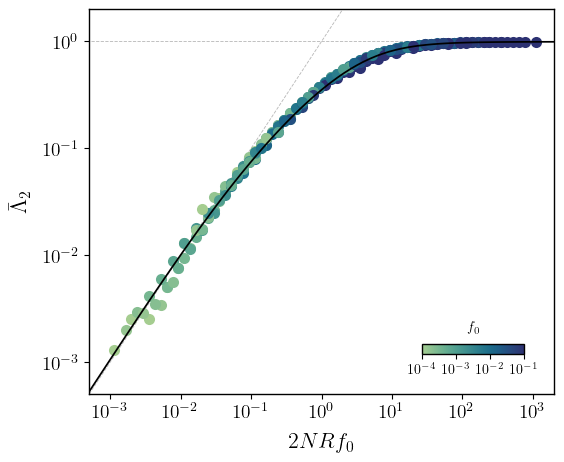

In [6]:
matplotlib.rcParams['axes.linewidth'] = 1

fig = plt.figure(figsize=(6,5))

cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-4, vmax=-1),cmap=sns.color_palette("crest", as_cmap=True))
grey = '#b9b9b9' 
w = 1.25 # linewidth

# plotting the numerical curve
plt.plot(rhos, [lambda_rho_neutral[x] for x in rhos], color='#000000', linewidth=w, zorder=5)

# plotting the asymptotics
plt.loglog(np.logspace(-6.5,5,25), np.ones_like(np.logspace(-6.5,5,25)), '--', color=grey, linewidth=w/2)
plt.loglog(np.logspace(-6.5,5,25), np.logspace(-6.5,5,25), '--', color=grey, linewidth=w/2)

# ploting the simulation results
regime = 'r'
xs = []; ys = []; cs = []
for j, f in enumerate(points[regime]['fs'][:-7]):

    color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(f)))
    
    for i, r in enumerate(points[regime]['rs']):
        if r < 5e-6 or r > 0.003: 
            continue
                    
        xs.append(2 * N * r * f)
        ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        cs.append(color)
        
# reshuffling point before plotting
random.seed(4321)        
idx = sorted(range(len(xs)), key=lambda x: random.random()) 
for i in idx:
    plt.loglog(xs[i], ys[i], 'o', markersize=8, markeredgecolor=cs[i]+'00', markerfacecolor=cs[i]) # label="$s_{A,B} = 10^{-2}$" + ", " + '$f_0=$' + "$10^{" + '{:0.0f}'.format(math.log10(f)) + "}$"    
    
plt.xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], 
           ['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$', '$10^{4}$'])
plt.yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
           ['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
plt.ylim([5e-4, 2])
plt.xlim([5e-4, 2e3])

plt.minorticks_off()
plt.tick_params(axis='both', labelsize=14)

plt.ylabel("$\\bar{\\Lambda}_2$", fontsize=16, labelpad=8)
plt.xlabel(r"$2NRf_0$", fontsize=16, labelpad=8)    

cbar_ax = fig.add_axes([0.68, 0.19, 0.17, 0.02])
cbar = plt.colorbar(cmap, alpha=1, cax=cbar_ax, orientation='horizontal', shrink=0.5, ticks=[-4, -3, -2, -1])
cbar.ax.set_xticklabels(['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$']);
cbar.set_label('$f_0$', labelpad=-40, y=0.45)

#plt.savefig('fig2_v8.png',dpi=600,bbox_inches='tight') 